# Nglview advance usage

In [4]:
import nglview as nv
from ase.build import molecule

## Obtain the C60 structure from ASE

In [5]:
c60 = molecule("C60")
c60.set_cell([[20, 0, 0],[0, 20, 0],[0, 0, 20]])
c60.center()
c60.pbc=True

## Show the fullerene structure by Nglview

In [6]:
view = nv.show_ase(c60)
view.add_unitcell()
view

NGLWidget()

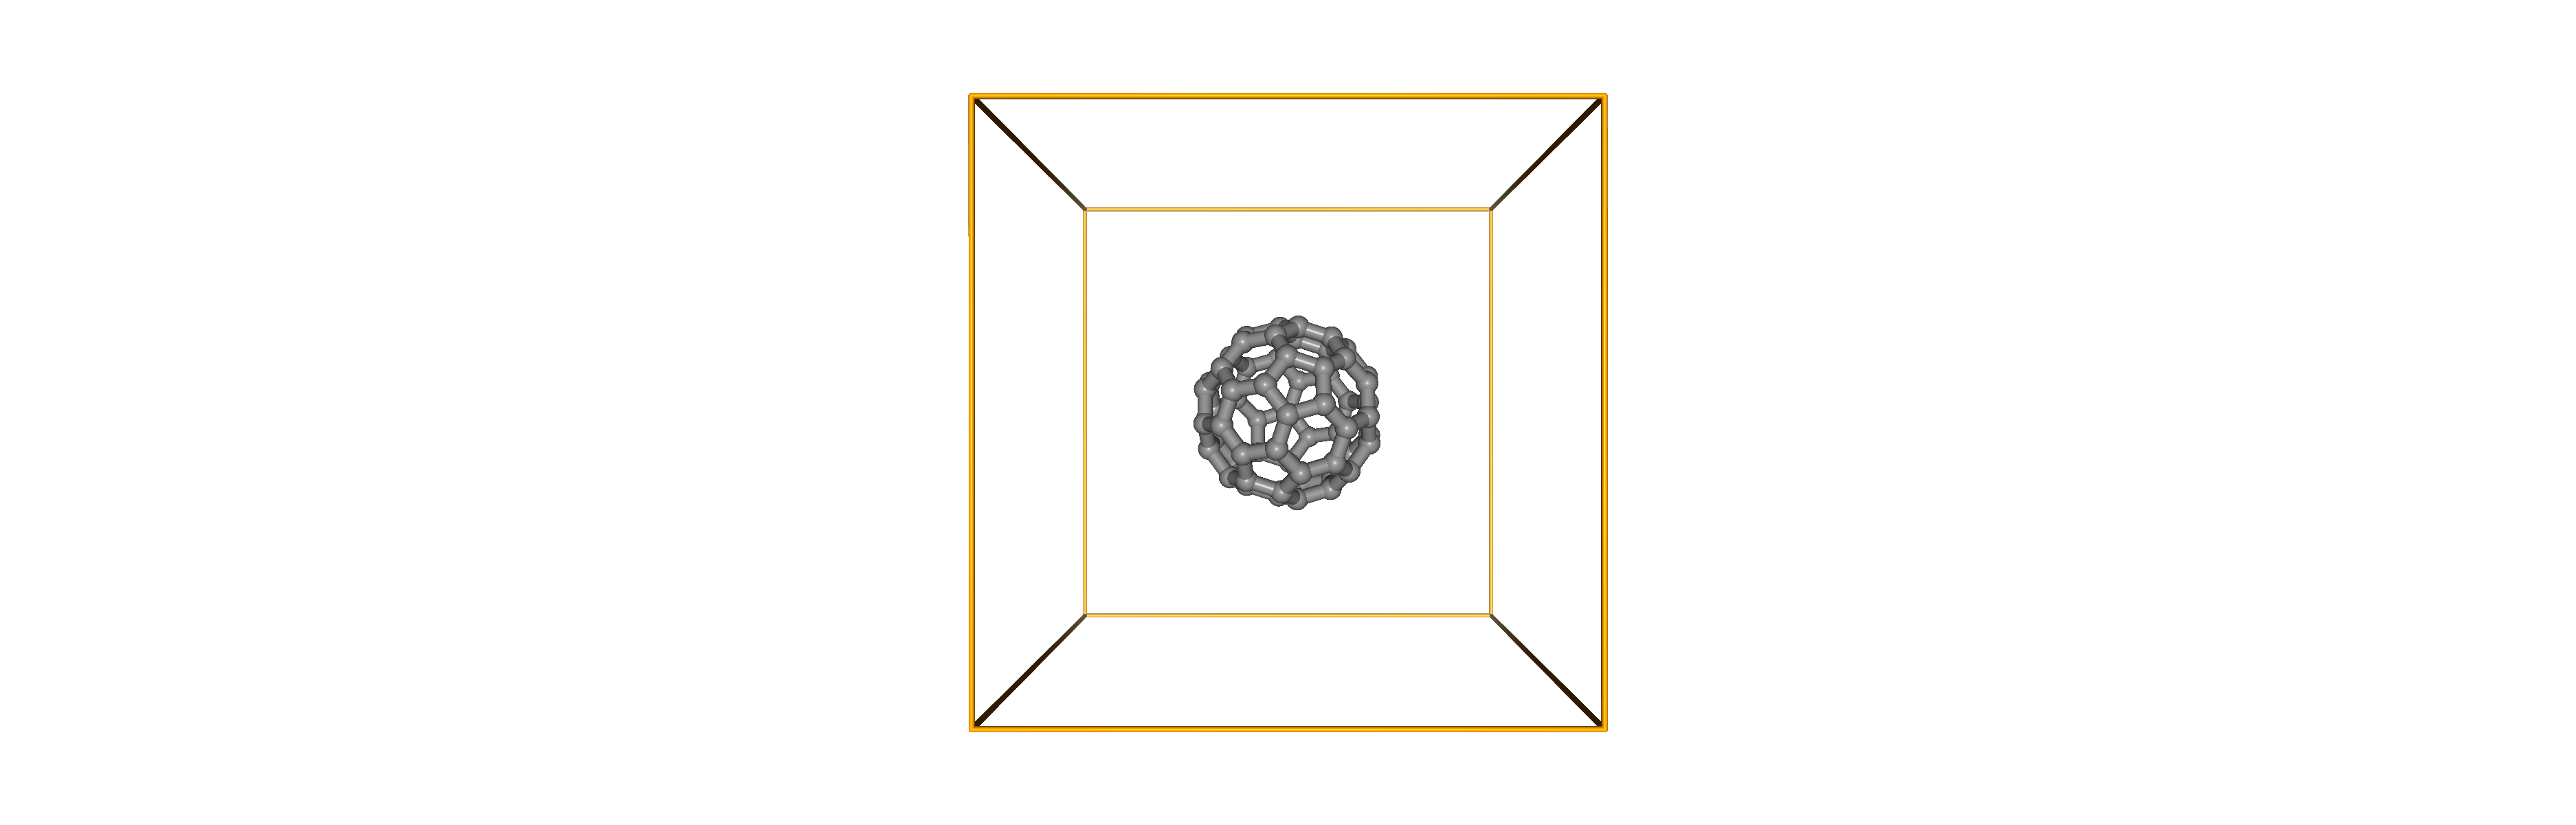

In [9]:
view.render_image()
view._display_image()

## Orientation

### Translation the fullerene by a vector [10, 0, 0]

In [11]:
view.control.translate([10, 0, 0])
view

NGLWidget(n_components=1)

### Zoom the structure by 1.5 

In [12]:
view.control.zoom(1.5)
view

NGLWidget(n_components=1)

## Plot isosurface

Here, I plot the CHGCAR from the VASP calculation of water molecule. 

In [9]:
from ase.io import read

aa = read("./H2O/CONTCAR");
view1 = nv.show_ase(aa);
view1.add_component('./H2O/CHGCAR.cube');
view1.clear()
view1.add_unitcell();
view1.component_0.add_surface(color='blue', isolevelType="value", isovalue=0.9)
view1

NGLWidget()

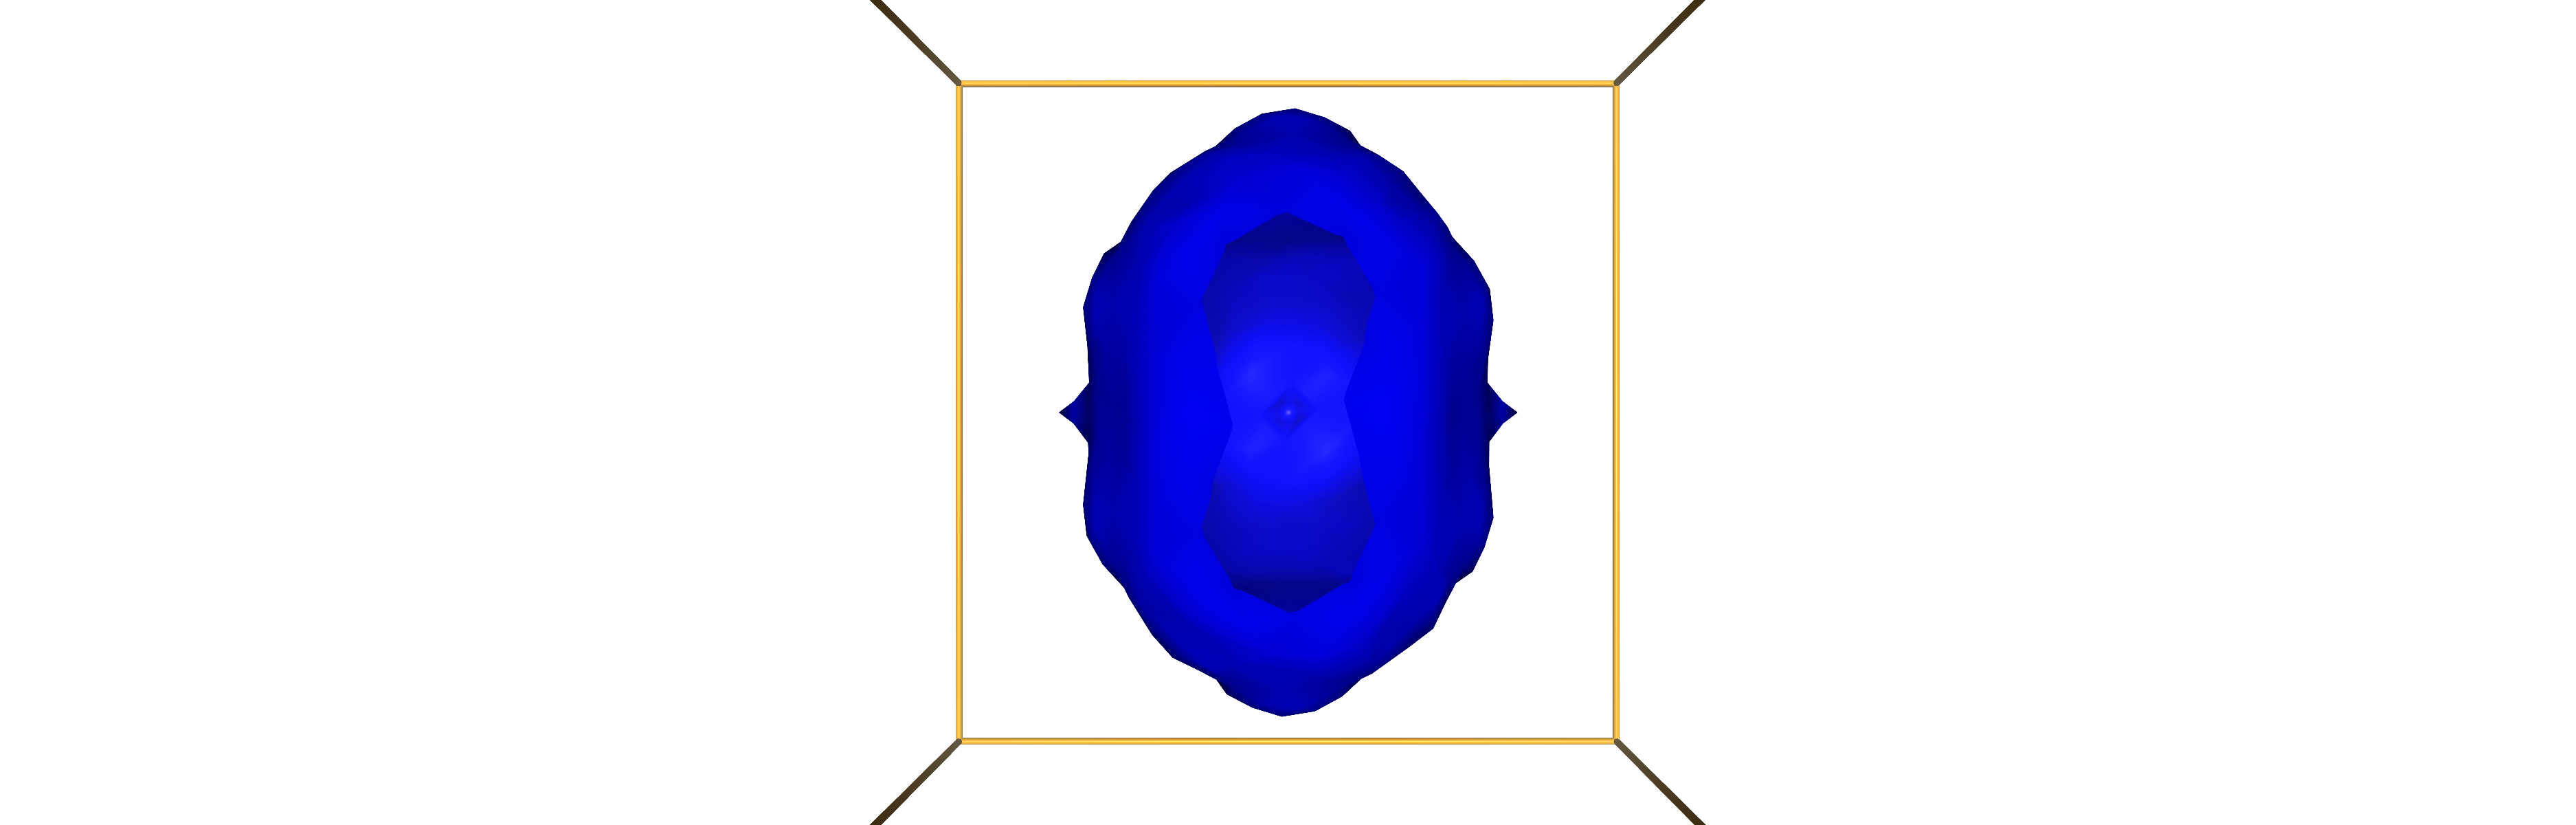

In [11]:
view1.render_image()
view1._display_image()

## Callback function in Nglview 

A callback function, which returns the picked atom number. 

In [12]:
from ipywidgets import Output, VBox

out = Output(layout={'border': '2px solid red'})

def on_picked_change(b):
    with out:
        try:
            print(b['new']['atom1']['index'])
        except:
            print()
        

view2 = nv.show_ase(c60)
view2.observe(on_picked_change, 'picked')
display(VBox([view2, out]))

## Add a sphere, a vector and a label from Nglview

* add_sphere(position, color, radius, name)
* add_arrow(position1, position2, color, radius, name)
* add_label(position, color, size, text)
* add_mesh(position, color, index, normal, name)


In [52]:
from nglview.utils import get_colors_from_b64

view3 = nv.NGLWidget()
view3.shape.add_sphere([0, 0, 9], [1, 0, 0], 1.5)
view3.shape.add_arrow([1, 2, 7 ], [30, 3, 3], [1, 0, 1], 1.0)
view3.shape.add_label([ 0, 4, -1 ], [ 0.2, 0.5, 0.8 ], 2.5, 'Test Vector')
view3.shape.add_mesh([ 0, 0, 0, 0, 20, 0, 20, 0, 0, 20, 20, 0],
                     [ 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])
view3

NGLWidget()

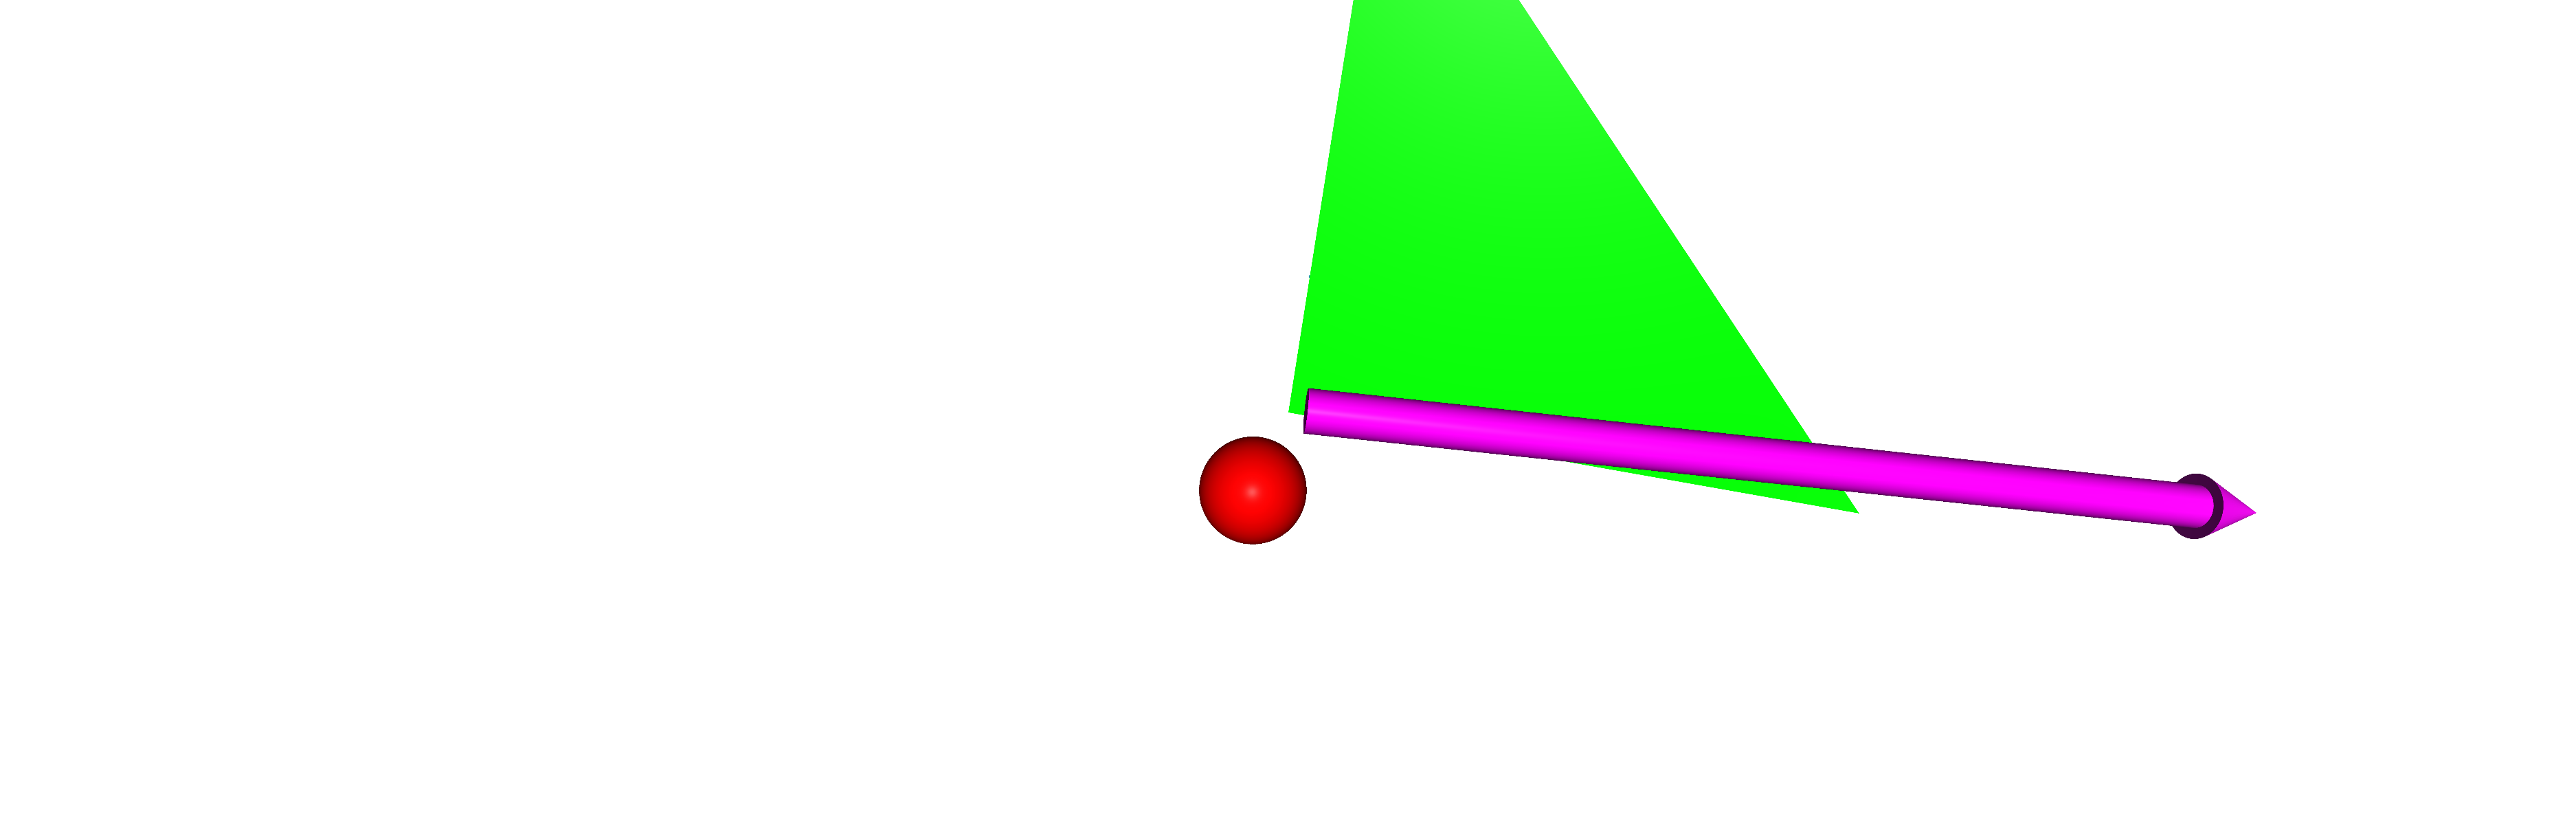

In [54]:
view3.render_image()
view3._display_image()

## Draw a cat with Nglview with different shapes 

* add_ellipsoid(position, color, radius, majorAxis, minorAxis, name)
* add_cone(position1, position2, color, radius, name) 
* add_cylinder(position1, position2, color, radius, name)

In [44]:
view4 = nv.NGLWidget()
shape = view4.shape
grey = [ 0.8, 0.8, 0.8 ]
darkgrey = [ 0.6, 0.6, 0.6 ]

shape.add_ellipsoid([ 0, 0, 0 ], grey, 4, [ 0, 3, 0 ], [ 0, 0, 1 ], "face")
shape.add_sphere([ -2, 1, -1 ], darkgrey, 0.3, "right eye")
shape.add_sphere([ 2, 1, -1 ], darkgrey, 0.3, "left eye")
shape.add_sphere([ 0, 0, -1 ], darkgrey, 0.5, "nose")
shape.add_ellipsoid([ -1, -1, -1 ], darkgrey, 1.3, [ 0, 1, 0 ], [ 0, 0, 0.3 ], "right cheek")
shape.add_ellipsoid([ 1, -1, -1 ], darkgrey, 1.3, [ 0, 1, 0 ], [ 0, 0, 0.3 ], "left cheek")
shape.add_cone([ 2.5, 1.7, 0 ], [ 4, 3, 0 ], darkgrey, 0.8, "left ear")
shape.add_cone([ -2.5, 1.7, 0 ], [ -4, 3, 0 ], darkgrey, 0.8, "right ear")
shape.add_cylinder([ -1, -1, -1 ], [ -4.3, -0.2, -1.2 ], darkgrey, 0.1, "whisker")
shape.add_cylinder([ -1, -1, -1 ], [ -4.5, -1.2, -1.2 ], darkgrey, 0.1, "whisker")
shape.add_cylinder([ -1, -1, -1 ], [ -4.2, -2.2, -1.2 ], darkgrey, 0.1, "whisker")
shape.add_cylinder([ 1, -1, -1 ], [ 4.3, -0.2, -1.2 ], darkgrey, 0.1, "whisker")
shape.add_cylinder([ 1, -1, -1 ], [ 4.5, -1.2, -1.2 ], darkgrey, 0.1, "whisker")
shape.add_cylinder([ 1, -1, -1 ], [ 4.2, -2.2, -1.2 ], darkgrey, 0.1, "whisker")
shape.add_label([ 0, 4, -1 ], [ 0.2, 0.5, 0.8 ], 2.5, "meow")
view4.control.orient([12.353482162080093,
 0,
 0,
 0,
 0,
 12.353482162080093,
 0,
 0,
 0,
 0,
 12.353482162080093,
 0,
 0,
 0,
 0,
 1])
view4

NGLWidget()

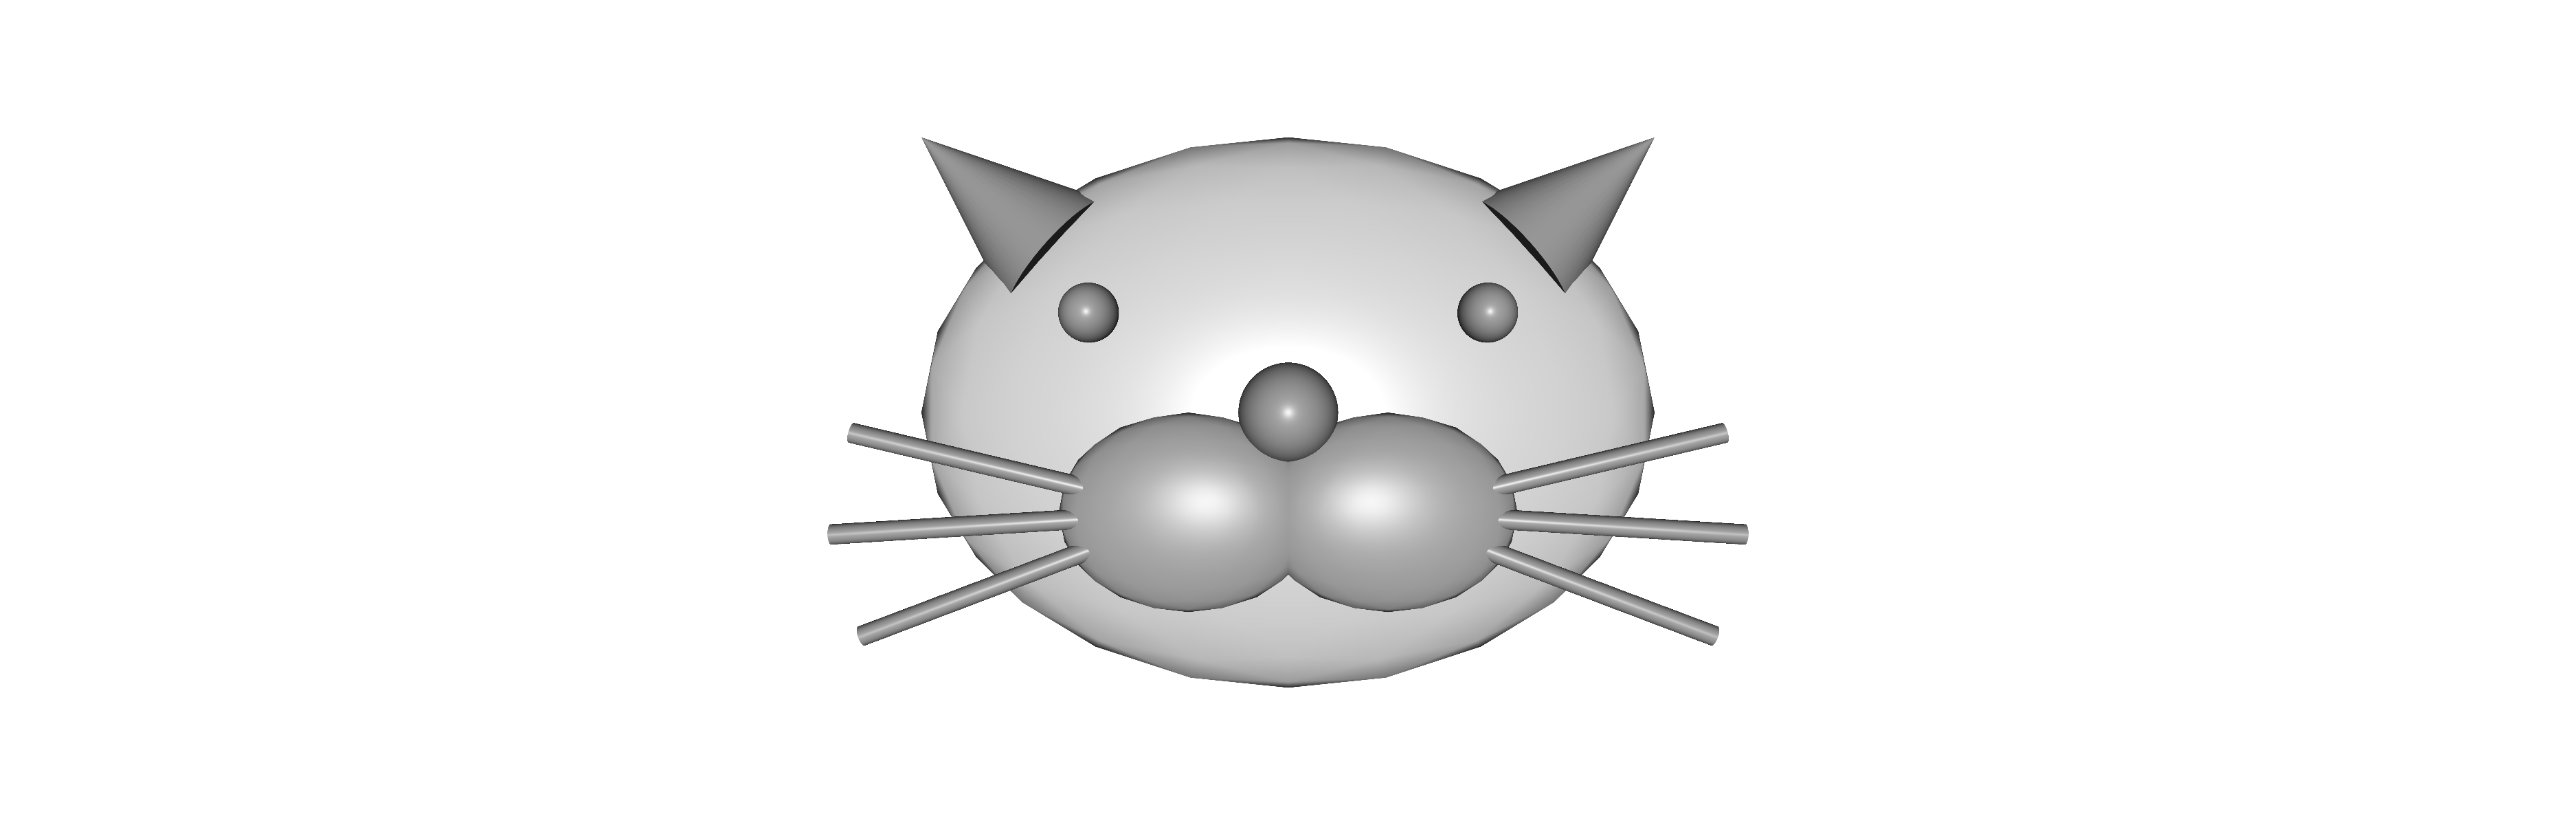

In [46]:
view4.render_image()
view4._display_image()


This work has been done with the support of the EPFL Open Science found [OSSCAR](http://www.osscar.org).

<img src="./figures/OSSCAR_logo.png" style="height:40px; width: 200px"/>